In [3]:
!pip install praat-parselmouth

In [18]:
import parselmouth
from parselmouth.praat import call
from pathlib import Path
import numpy as np

def extract_features(audio_path):
    sound = parselmouth.Sound(str(audio_path))
    left_channel = sound.extract_left_channel()

    #  pitch
    pitch = call(left_channel, "To Pitch (ac)", 0.0, 75, 15, False, 0.03, 0.45, 0.01, 0.35, 0.14, 600)
    pitch_values = pitch.selected_array["frequency"]
    pitch_values = pitch_values[pitch_values != 0]  

    #  intensity
    intensity = call(left_channel, "To Intensity", 75, 0.0, True)
    intensity_values = intensity.values[0]
    intensity_values = intensity_values[intensity_values != 0]  

    # min, max, mean for pitch and intensity
    min_pitch = np.min(pitch_values) if len(pitch_values) > 0 else 0
    max_pitch = np.max(pitch_values) if len(pitch_values) > 0 else 0
    mean_pitch = np.mean(pitch_values) if len(pitch_values) > 0 else 0

    min_intensity = np.min(intensity_values) if len(intensity_values) > 0 else 0
    max_intensity = np.max(intensity_values) if len(intensity_values) > 0 else 0
    mean_intensity = np.mean(intensity_values) if len(intensity_values) > 0 else 0

    return min_pitch, max_pitch, mean_pitch, min_intensity, max_intensity, mean_intensity

audio_directory = Path('speech_files')

raw_features_list = []

# processing
for audio_file in audio_directory.glob('*.wav'):
    min_pitch, max_pitch, mean_pitch, min_intensity, max_intensity, mean_intensity = extract_features(audio_file)
    raw_features_list.append({
        'filename': audio_file.name,
        'min_pitch': min_pitch,
        'max_pitch': max_pitch,
        'mean_pitch': mean_pitch,
        'min_intensity': min_intensity,
        'max_intensity': max_intensity,
        'mean_intensity': mean_intensity
    })

print(raw_features_list[:10])



[{'filename': 'mf_001_interest_2590.84_Eight-hundred-two.wav', 'min_pitch': 124.1150006341078, 'max_pitch': 396.8207773108546, 'mean_pitch': 293.7440963102896, 'min_intensity': 36.64981270372906, 'max_intensity': 69.56614303651587, 'mean_intensity': 56.97550222383221}, {'filename': 'mf_001_anxiety_1171.28_Six-hundred-one.wav', 'min_pitch': 146.91027846215226, 'max_pitch': 240.10758833236872, 'mean_pitch': 164.44518329141647, 'min_intensity': 47.60305640054521, 'max_intensity': 73.59320152100808, 'mean_intensity': 65.75065920505627}, {'filename': 'cc_001_pride_2501.34_March-twenty-fifth.wav', 'min_pitch': 94.3263930633108, 'max_pitch': 200.0257548970265, 'mean_pitch': 122.17742051481807, 'min_intensity': 25.397396404258927, 'max_intensity': 64.19191871200685, 'mean_intensity': 48.73612408094378}, {'filename': 'cc_001_boredom_2278.62_Six-hundred-six.wav', 'min_pitch': 88.46391252738616, 'max_pitch': 218.53376025988726, 'mean_pitch': 128.60917763092007, 'min_intensity': 23.94579398153832,

In [23]:
print(len(raw_features_list))

2324


In [19]:
import parselmouth
from parselmouth.praat import call
from pathlib import Path
import numpy as np
from collections import defaultdict

def extract_features(audio_path):
    sound = parselmouth.Sound(str(audio_path))
    left_channel = sound.extract_left_channel()
    pitch = call(left_channel, "To Pitch (ac)", 0.0, 75, 15, False, 0.03, 0.45, 0.01, 0.35, 0.14, 600)
    pitch_values = pitch.selected_array["frequency"]
    intensity = call(left_channel, "To Intensity", 75, 0.0, True)
    intensity_values = intensity.values[0]
    return pitch_values, intensity_values

audio_directory = Path('speech_files')
speaker_features = defaultdict(lambda: {'pitch': [], 'intensity': []})
features_list = []

for audio_file in audio_directory.glob('*.wav'):
    pitch_values, intensity_values = extract_features(audio_file)
    speaker = audio_file.stem.split('_')[0]
    pitch_values = pitch_values[pitch_values != 0]  
    intensity_values = intensity_values[intensity_values != 0]  
    speaker_features[speaker]['pitch'].extend(pitch_values)
    speaker_features[speaker]['intensity'].extend(intensity_values)

    # mean and std deviation for normalization
    mean_pitch = np.mean(speaker_features[speaker]['pitch'])
    std_pitch = np.std(speaker_features[speaker]['pitch']) if np.std(speaker_features[speaker]['pitch']) else 1
    mean_intensity = np.mean(speaker_features[speaker]['intensity'])
    std_intensity = np.std(speaker_features[speaker]['intensity']) if np.std(speaker_features[speaker]['intensity']) else 1

    # normalizing -
    normalized_pitch = (pitch_values - mean_pitch) / std_pitch
    normalized_intensity = (intensity_values - mean_intensity) / std_intensity

    #  statistics
    min_pitch, max_pitch, mean_pitch = np.min(normalized_pitch), np.max(normalized_pitch), np.mean(normalized_pitch)
    min_intensity, max_intensity, mean_intensity = np.min(normalized_intensity), np.max(normalized_intensity), np.mean(normalized_intensity)

    features_list.append({
        'filename': audio_file.name,
        'min_pitch': min_pitch,
        'max_pitch': max_pitch,
        'mean_pitch': mean_pitch,
        'min_intensity': min_intensity,
        'max_intensity': max_intensity,
        'mean_intensity': mean_intensity
    })

print(features_list[:10])




[{'filename': 'mf_001_interest_2590.84_Eight-hundred-two.wav', 'min_pitch': -2.0741091934108247, 'max_pitch': 1.2603515383803705, 'mean_pitch': -6.125368411725002e-17, 'min_intensity': -2.2745232313614605, 'max_intensity': 1.4089413792261545, 'mean_intensity': 2.9341608507950565e-16}, {'filename': 'mf_001_anxiety_1171.28_Six-hundred-one.wav', 'min_pitch': -0.9636322684866844, 'max_pitch': 0.08417086484676475, 'mean_pitch': -0.7664900092477359, 'min_intensity': -1.5308920093807297, 'max_intensity': 1.3833448432967428, 'mean_intensity': 0.5039720760460206}, {'filename': 'cc_001_pride_2501.34_March-twenty-fifth.wav', 'min_pitch': -1.2304095061406282, 'max_pitch': 3.439202766499725, 'mean_pitch': -2.837236618486511e-16, 'min_intensity': -2.716153844804485, 'max_intensity': 1.7987405566074783, 'mean_intensity': -1.4288087621262885e-15}, {'filename': 'cc_001_boredom_2278.62_Six-hundred-six.wav', 'min_pitch': -1.0061939787064669, 'max_pitch': 2.6070748136539224, 'mean_pitch': 0.10901939386510

In [20]:
from collections import defaultdict
import numpy as np

def organize_data(features_list):
    data_by_emotion = defaultdict(lambda: defaultdict(list))
    for entry in features_list:
        emotion = entry['filename'].split('_')[2]
        for feature in ['min_pitch', 'max_pitch', 'mean_pitch', 'min_intensity', 'max_intensity', 'mean_intensity']:
            data_by_emotion[emotion][feature].append(entry[feature])
    return data_by_emotion

data_normalized = organize_data(features_list)  # data after normalization
data_raw = organize_data(raw_features_list)     # data before normalization 


In [21]:
def calculate_stats(data_by_emotion):
    stats = defaultdict(lambda: defaultdict(dict))
    for emotion, features in data_by_emotion.items():
        for feature, values in features.items():
            stats[emotion][feature] = {
                'mean': np.mean(values),
                'std': np.std(values)
            }
    return stats

stats_normalized = calculate_stats(data_normalized)
stats_raw = calculate_stats(data_raw)


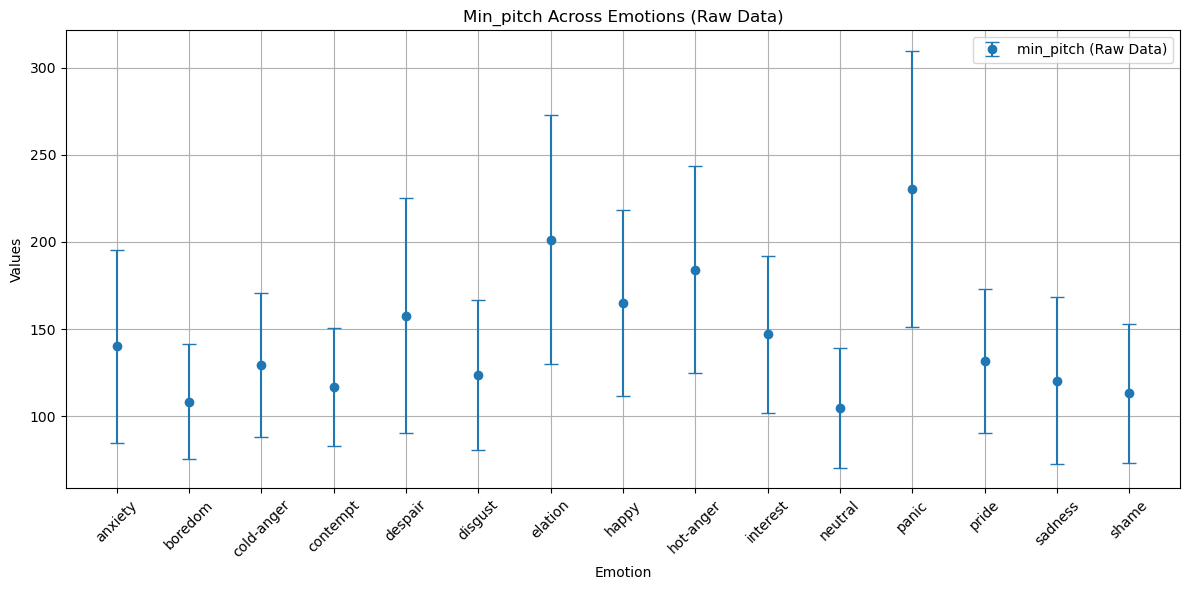

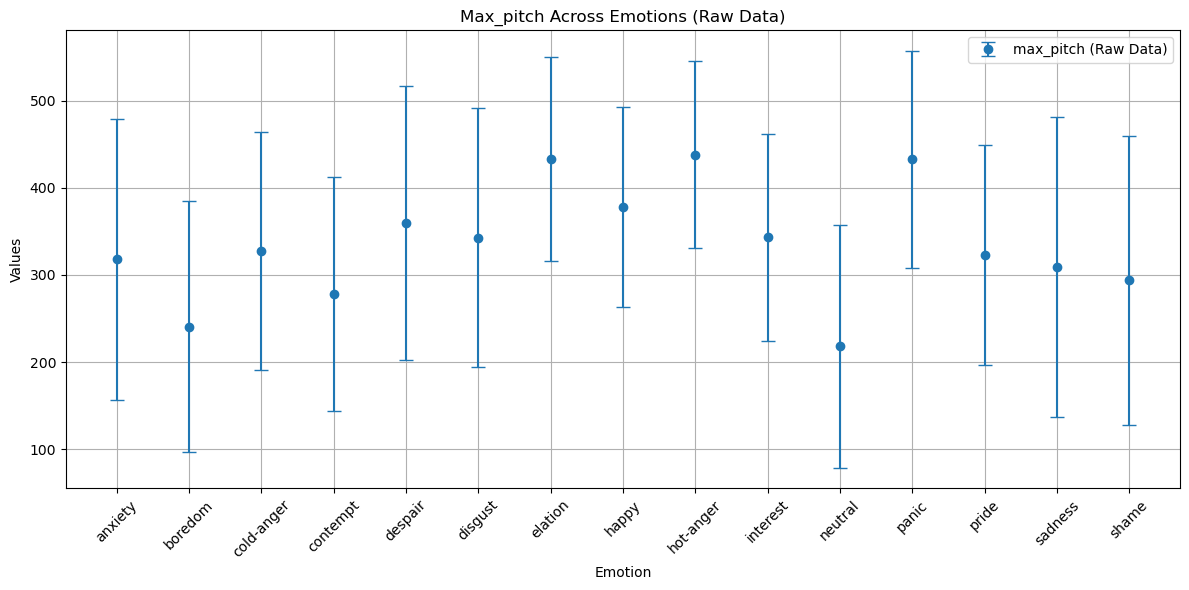

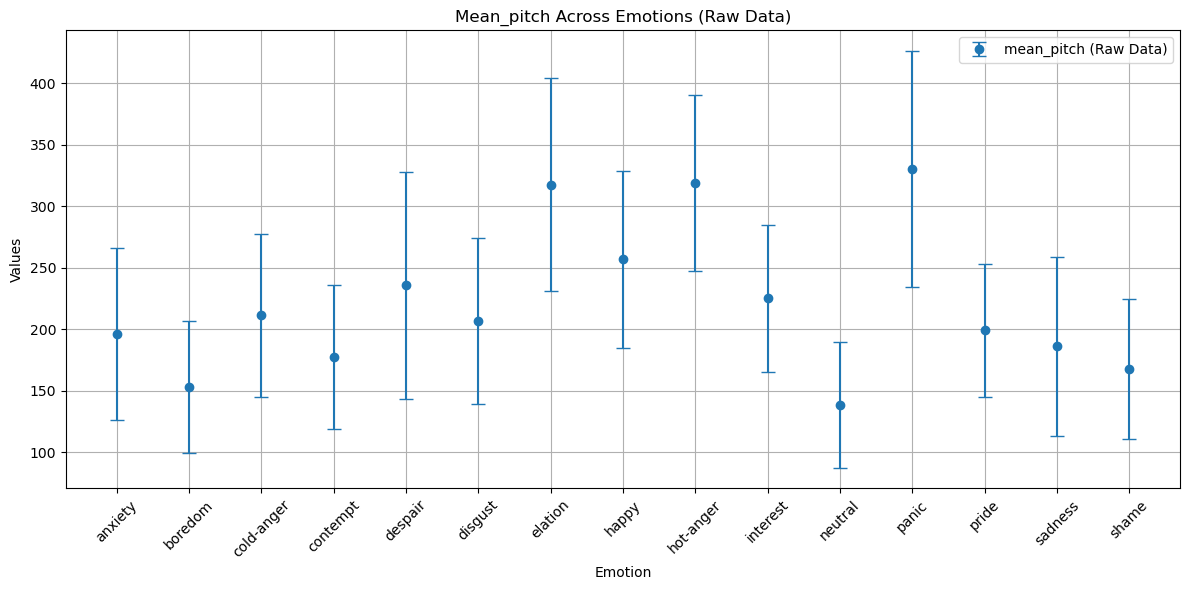

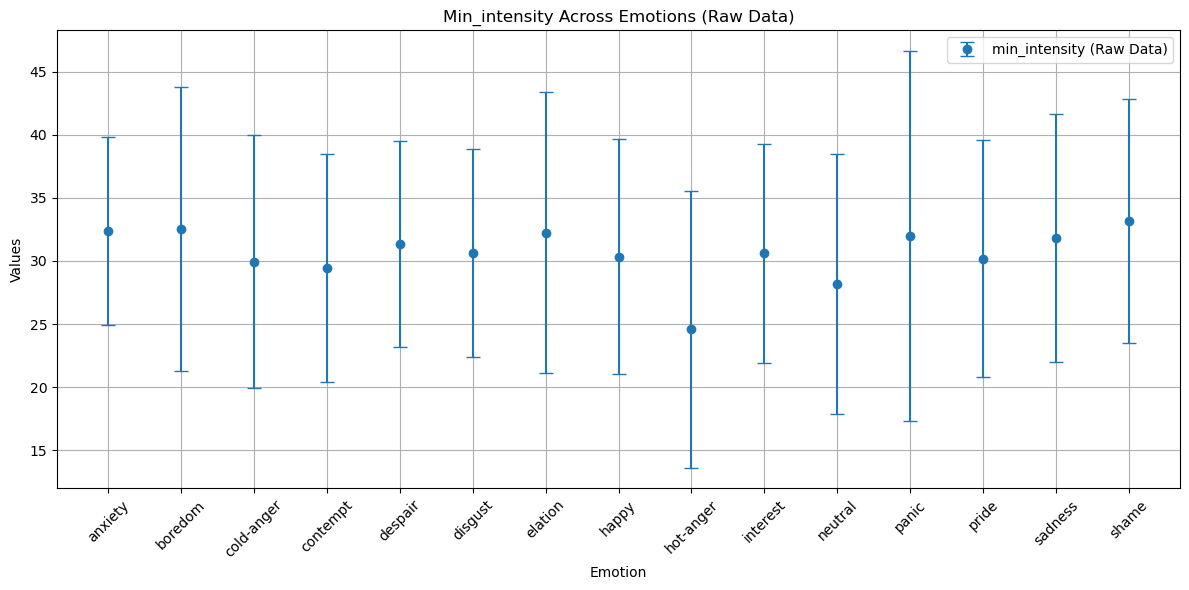

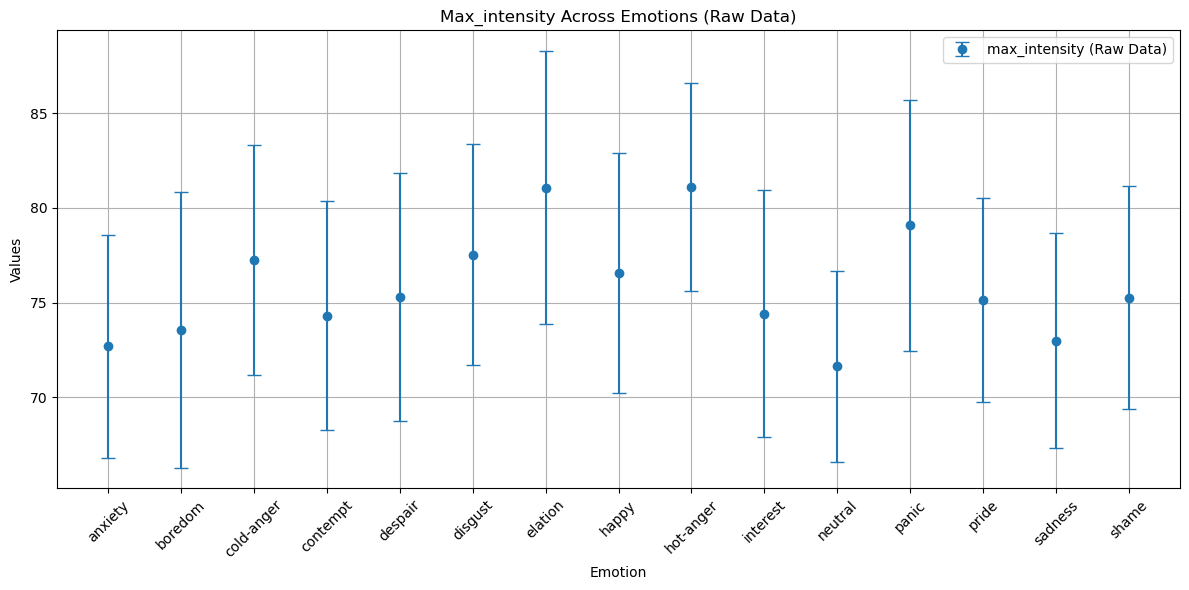

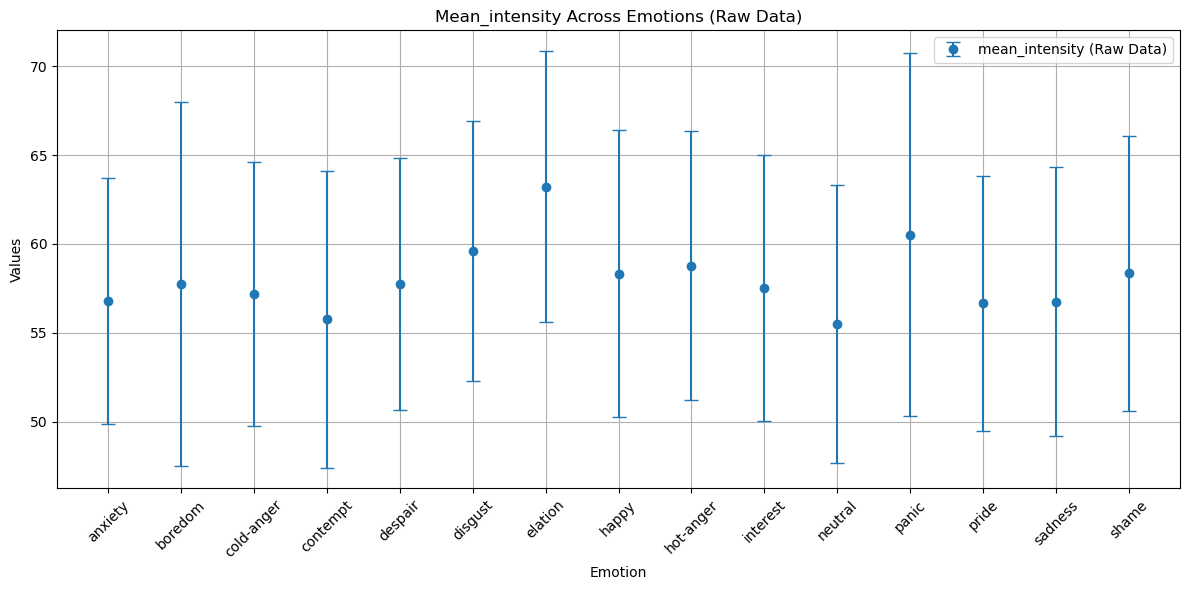

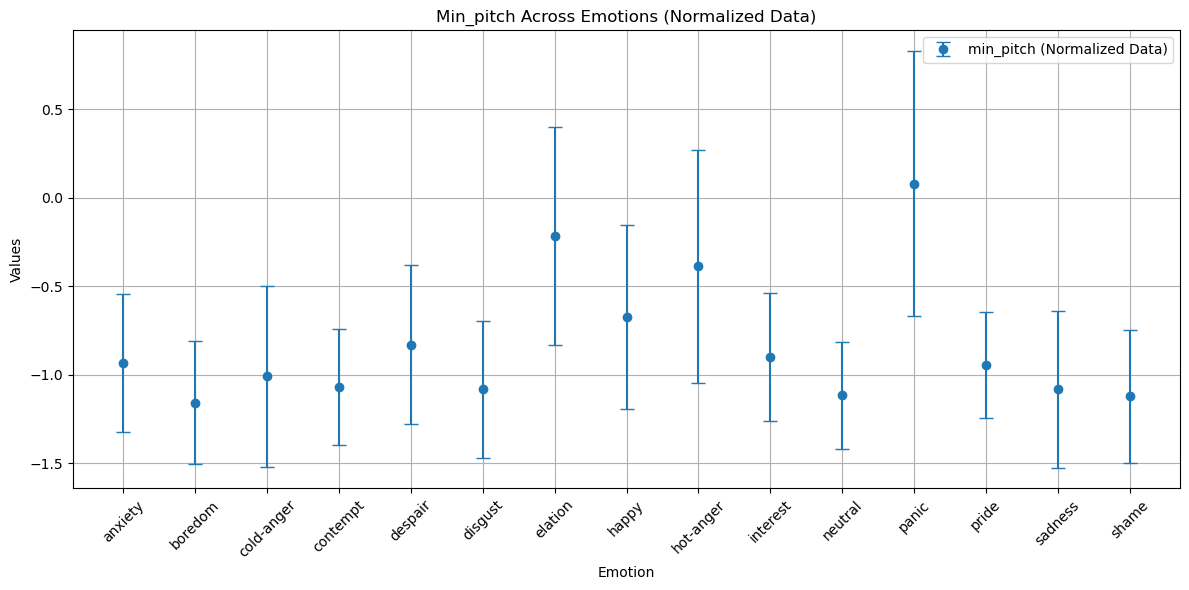

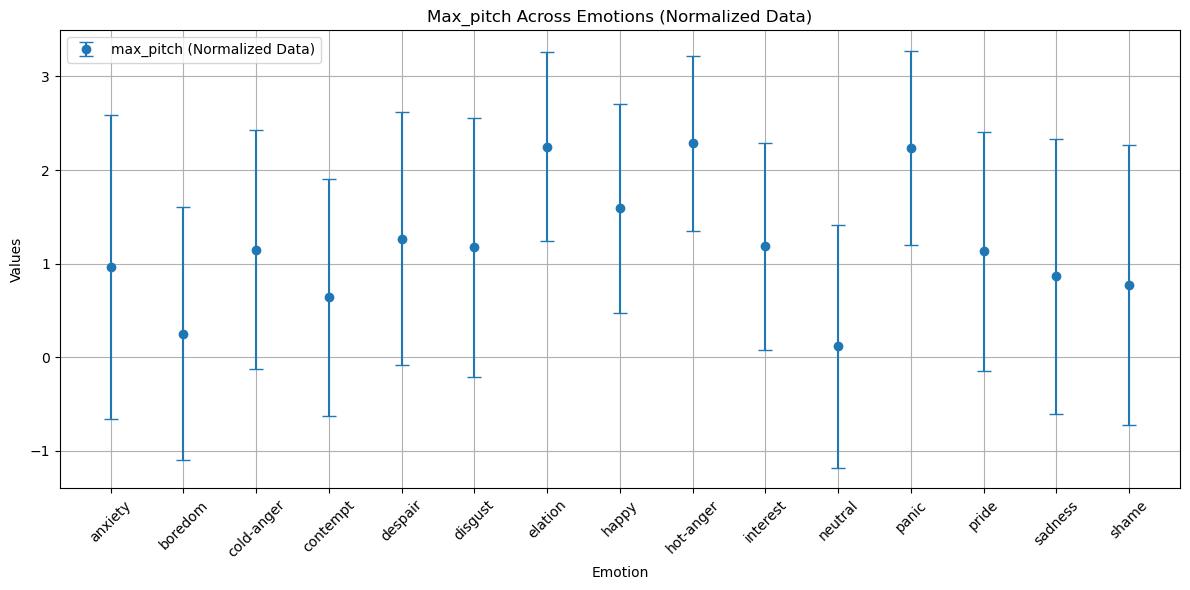

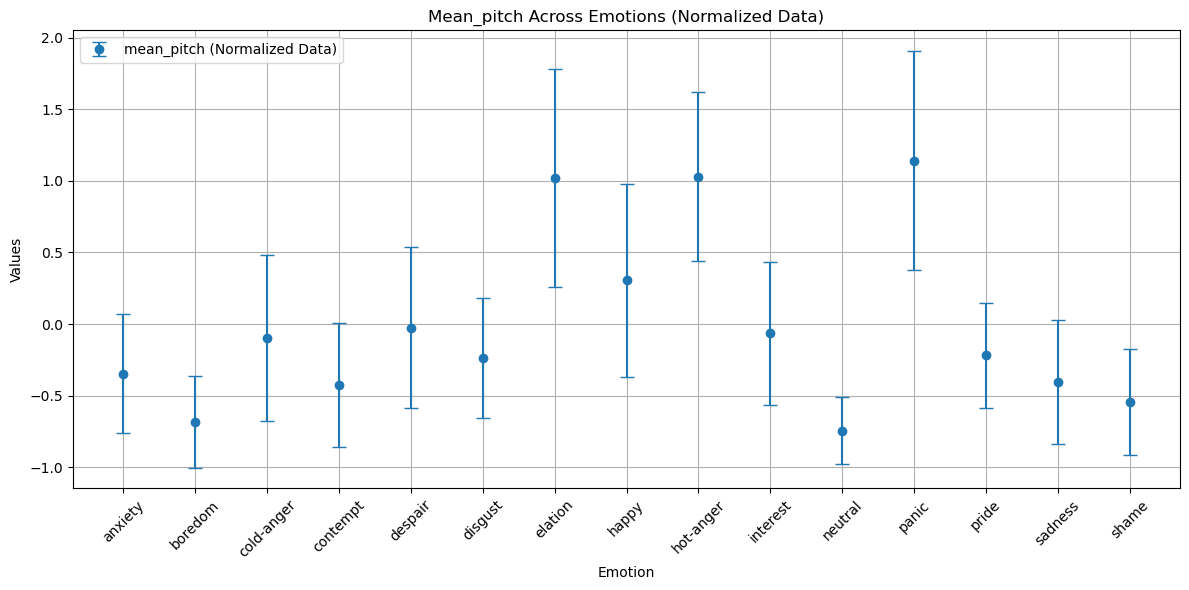

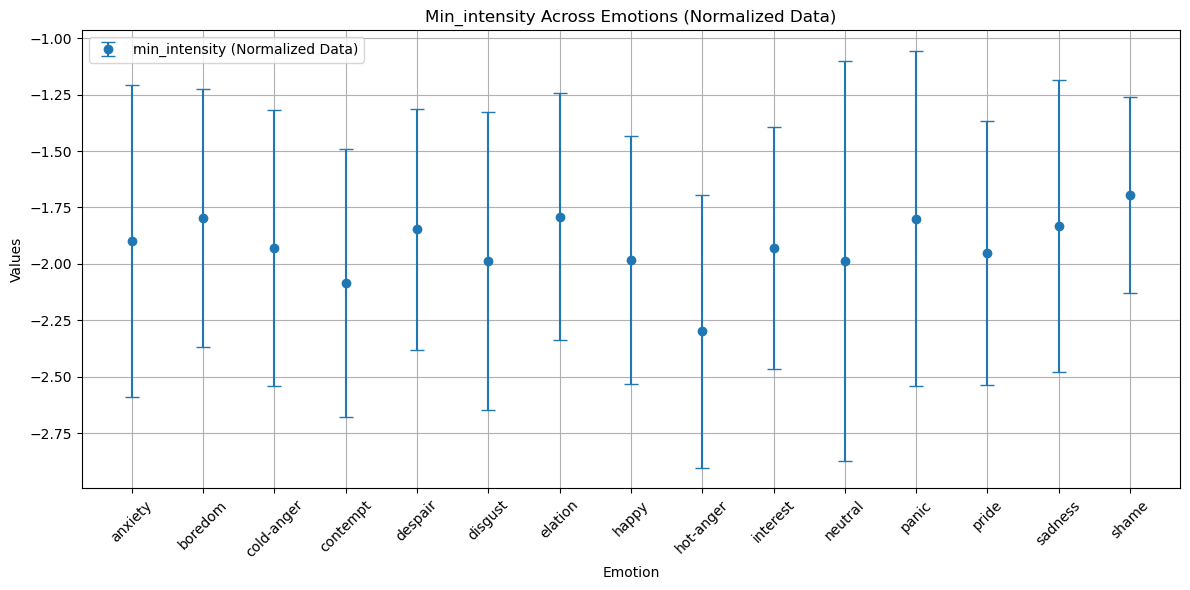

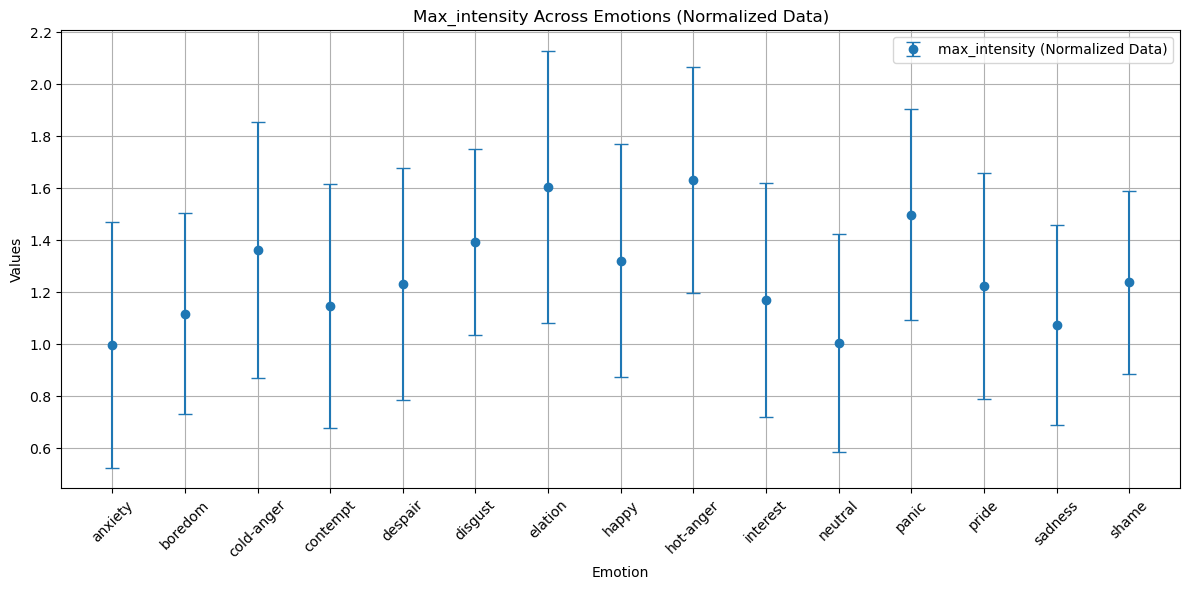

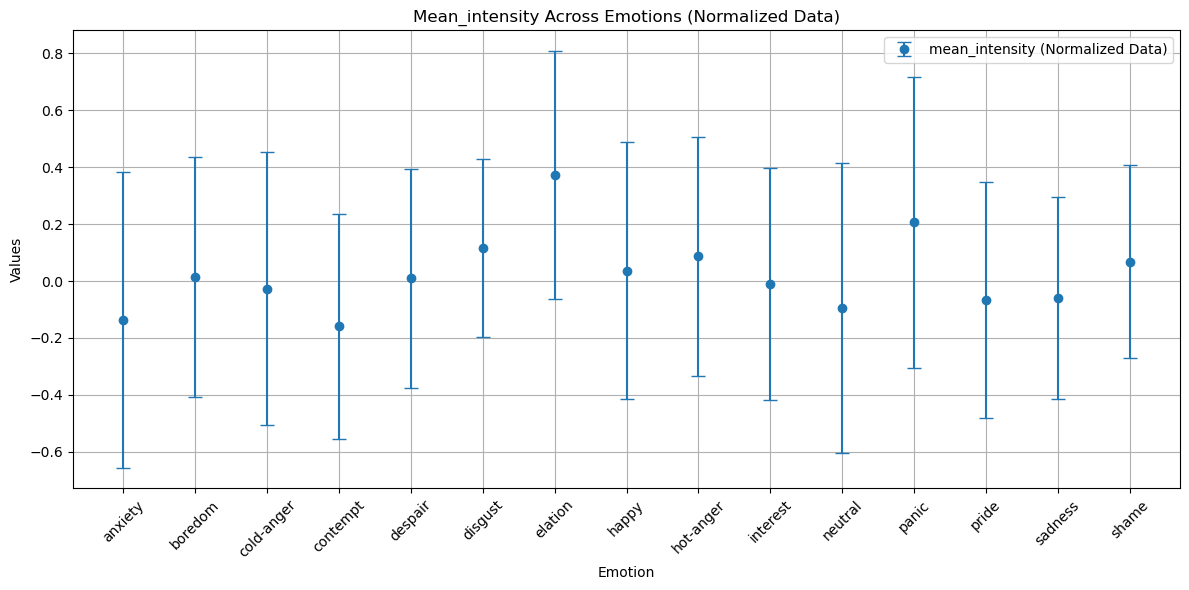

In [22]:
import matplotlib.pyplot as plt
def plot_data(stats, title_suffix):
    for feature in ['min_pitch', 'max_pitch', 'mean_pitch', 'min_intensity', 'max_intensity', 'mean_intensity']:
        emotions = sorted(stats.keys())
        means = [stats[emotion][feature]['mean'] for emotion in emotions]
        stds = [stats[emotion][feature]['std'] for emotion in emotions]

        plt.figure(figsize=(12, 6))
        plt.errorbar(emotions, means, yerr=stds, fmt='o', capsize=5, label=f'{feature} {title_suffix}')
        plt.title(f'{feature.capitalize()} Across Emotions {title_suffix}')
        plt.ylabel('Values')
        plt.xlabel('Emotion')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Plotting
plot_data(stats_raw, '(Raw Data)')
plot_data(stats_normalized, '(Normalized Data)')